In [1]:
import pandas as pd


exams_result = pd.read_csv('exams.csv')
exams_result.head()

,id,diagnosis,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6,exam_7,exam_8,...,exam_24,exam_25,exam_26,exam_27,exam_28,exam_29,exam_30,exam_31,exam_32,exam_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
exams_result.isnull().sum()

id             0
diagnosis      0
exam_1         0
exam_2         0
exam_3         0
exam_4         0
exam_5         0
exam_6         0
exam_7         0
exam_8         0
exam_9         0
exam_10        0
exam_11        0
exam_12        0
exam_13        0
exam_14        0
exam_15        0
exam_16        0
exam_17        0
exam_18        0
exam_19        0
exam_20        0
exam_21        0
exam_22        0
exam_23        0
exam_24        0
exam_25        0
exam_26        0
exam_27        0
exam_28        0
exam_29        0
exam_30        0
exam_31        0
exam_32        0
exam_33      419
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random


SEED = 123143
random.seed(SEED)

exams_values = exams_result.drop(columns=['id', 'diagnosis'])
diagnosis = exams_result['diagnosis']

exams_values_v1 = exams_values.drop(columns="exam_33")

X_train, X_test, y_train, y_test = train_test_split(exams_values_v1, 
                                                        diagnosis,
                                                        test_size = 0.3)



classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)
print("Classification result %.2f%%" %(classifier.score(X_test, y_test)*100))

Classification result 92.40%


In [4]:
from sklearn.dummy import DummyClassifier


SEED = 123143
random.seed(SEED)

dummy_classifier = DummyClassifier(strategy= "most_frequent")
dummy_classifier.fit(X_train, y_train)
print("Dummy classifier result %.2f%%" %(dummy_classifier.score(X_test, y_test)*100))

Dummy classifier result 66.67%


In [5]:
from sklearn.preprocessing import StandardScaler


standardizer = StandardScaler()
standardizer.fit(exams_values_v1)
exams_values_v2 = standardizer.transform(exams_values_v1)
exams_values_v2 = pd.DataFrame(data=exams_values_v2,
                                columns=exams_values_v1.keys())

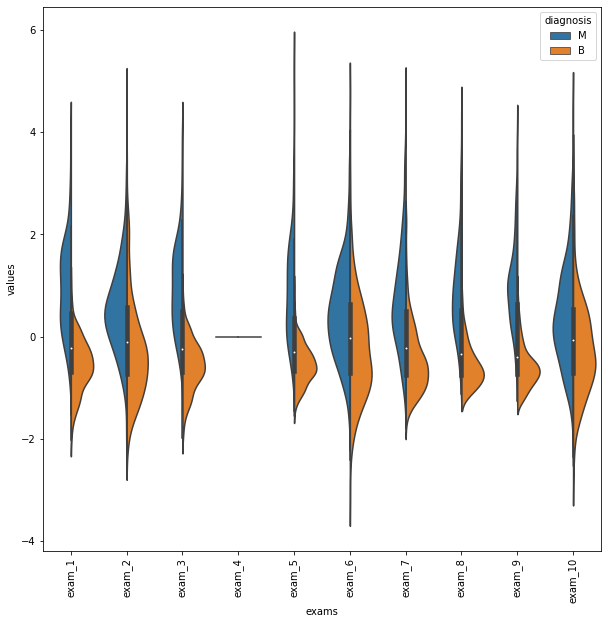

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


def violin_graph(values, start, end):
    
    data_plot = pd.concat([diagnosis, values.iloc[:,start:end]], axis = 1)
    data_plot = pd.melt(data_plot, id_vars="diagnosis",
                         var_name="exams",
                         value_name='values')
    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exams", y = "values", hue = "diagnosis",
                   data = data_plot, split= True)
    plt.xticks(rotation = 90)

violin_graph(exams_values_v2, 0, 10)

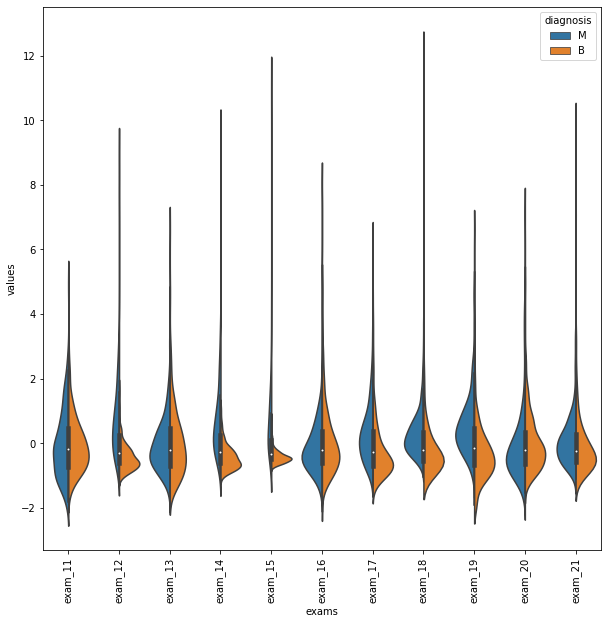

In [7]:
violin_graph(exams_values_v2, 10, 21)

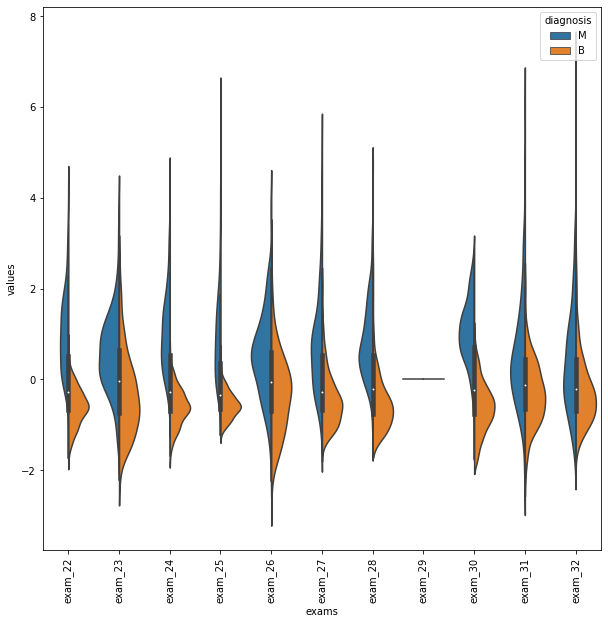

In [8]:
violin_graph(exams_values_v2, 21, 32)

In [9]:
exams_values_v3 = exams_values_v2.drop(columns=["exam_29", "exam_4"])

def classification(values):
    SEED = 1234
    random.seed(SEED)
    X_train, X_test, y_train, y_test = train_test_split(values, 
                                                        diagnosis,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators = 100)
    classifier.fit(X_train, y_train)
    print("Classification result %.2f%%" %(classifier.score(X_test, y_test)*100))

classification(exams_values_v3)

Classification result 92.98%


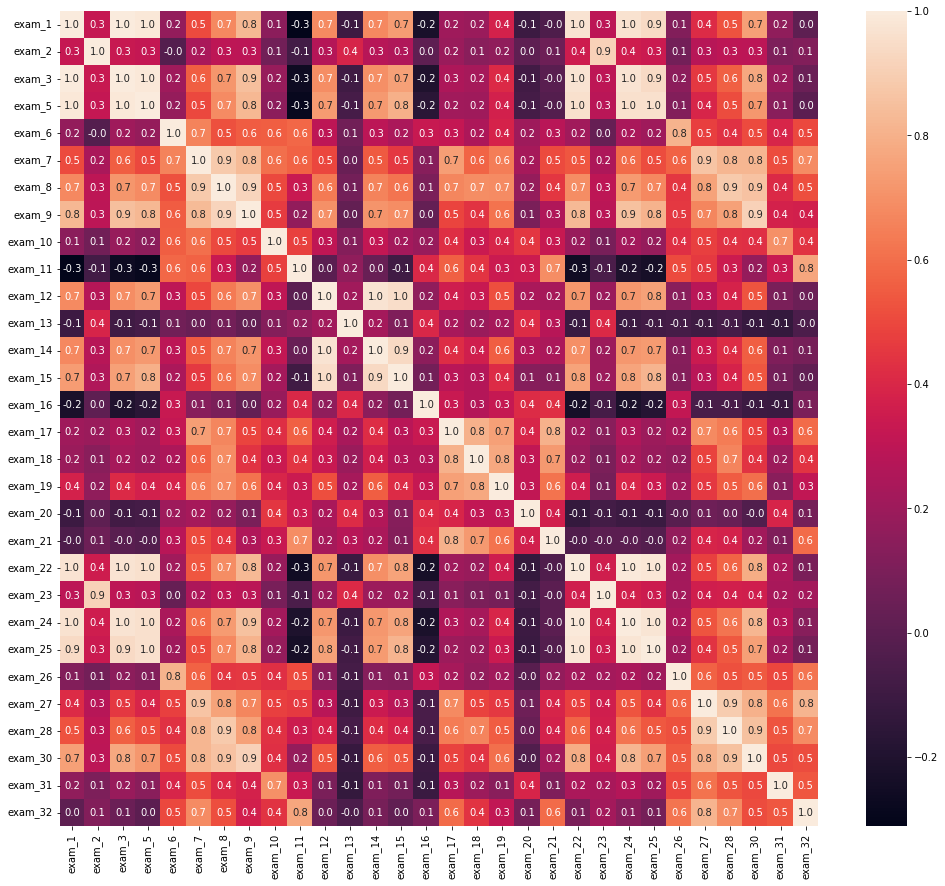

In [10]:
correlation_matrix = exams_values_v3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(correlation_matrix, annot = True, fmt = ".1f")

In [11]:
correlation_matrix_v1 = correlation_matrix[correlation_matrix>0.99]
correlation_matrix_v1

,exam_1,exam_2,exam_3,exam_5,exam_6,exam_7,exam_8,exam_9,exam_10,exam_11,...,exam_22,exam_23,exam_24,exam_25,exam_26,exam_27,exam_28,exam_30,exam_31,exam_32
exam_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
correlation_matrix_v2 = correlation_matrix_v1.sum()
correlation_matrix_v2

exam_1     1.997855
exam_2     1.000000
exam_3     1.997855
exam_5     1.000000
exam_6     1.000000
exam_7     1.000000
exam_8     1.000000
exam_9     1.000000
exam_10    1.000000
exam_11    1.000000
exam_12    1.000000
exam_13    1.000000
exam_14    1.000000
exam_15    1.000000
exam_16    1.000000
exam_17    1.000000
exam_18    1.000000
exam_19    1.000000
exam_20    1.000000
exam_21    1.000000
exam_22    1.993708
exam_23    1.000000
exam_24    1.993708
exam_25    1.000000
exam_26    1.000000
exam_27    1.000000
exam_28    1.000000
exam_30    1.000000
exam_31    1.000000
exam_32    1.000000
dtype: float64

In [13]:
correlated_variables = correlation_matrix_v2[correlation_matrix_v2>1]
correlated_variables

exam_1     1.997855
exam_3     1.997855
exam_22    1.993708
exam_24    1.993708
dtype: float64

In [14]:
exams_values_v4 = exams_values_v3.drop(columns=correlated_variables.keys())
exams_values_v4

,exam_2,exam_5,exam_6,exam_7,exam_8,exam_9,exam_10,exam_11,exam_12,exam_13,...,exam_20,exam_21,exam_23,exam_25,exam_26,exam_27,exam_28,exam_30,exam_31,exam_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [15]:
classification(exams_values_v4)

Classification result 91.81%


In [16]:
exams_values_v5 = exams_values_v3.drop(columns=["exam_3", "exam_24"])
classification(exams_values_v5)

Classification result 92.98%


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest = SelectKBest(chi2, k = 5)

In [18]:
exams_values_v6 = exams_values_v1.drop(columns=(["exam_4", "exam_29", "exam_3", "exam_24"]))

In [19]:
SEED= 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(exams_values_v6, 
                                                        diagnosis,
                                                        test_size = 0.3)



kbest.fit(X_train,y_train)
kbest_train = kbest.transform(X_train)
kbest_test = kbest.transform(X_test)
kbest_test.shape

(171, 5)

In [20]:
classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(kbest_train, y_train)
print("Classification result %.2f%%" %(classifier.score(kbest_test, y_test)*100))

Classification result 92.40%


In [21]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, classifier.predict(kbest_test))

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Prediction')]

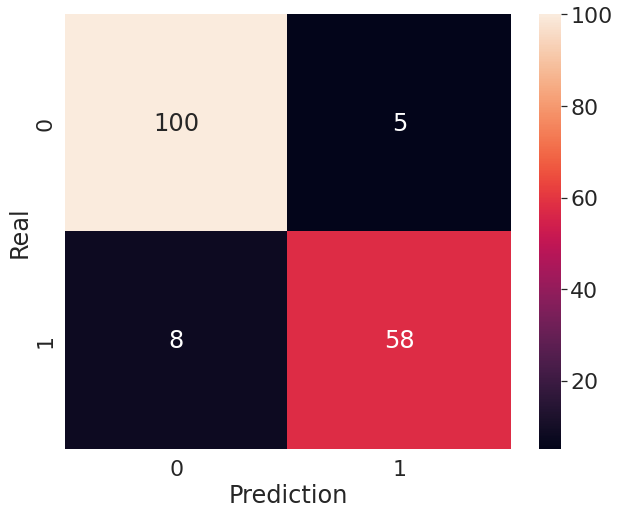

In [22]:
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(confusion_mat, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel= "Real")

Classification result 87.13%


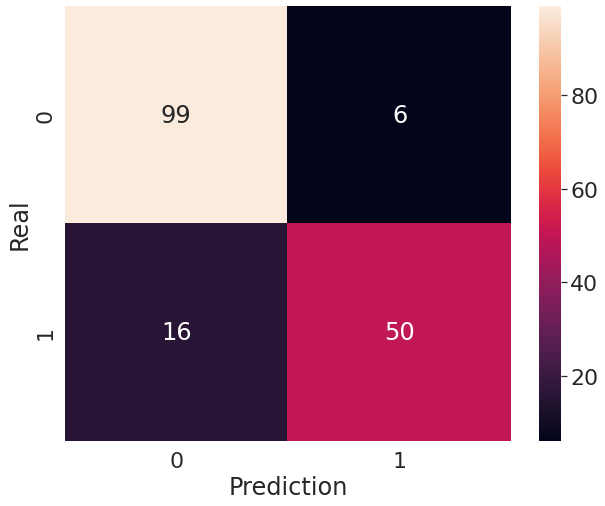

In [48]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(exams_values_v6, 
                                                        diagnosis,
                                                        test_size = 0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(X_train, y_train)
rfe_selection = RFE(estimator = classifier, n_features_to_select = 2, step = 1)
rfe_selection.fit(X_train, y_train)
rfe_train = rfe_selection.transform(X_train)
rfe_test = rfe_selection.transform(X_test)
classifier.fit(rfe_train, y_train)

confusion_mat = confusion_matrix(y_test, classifier.predict(rfe_test))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(confusion_mat, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel= "Real")

print("Classification result %.2f%%" %(classifier.score(rfe_test, y_test)*100))

Classification result 92.98%


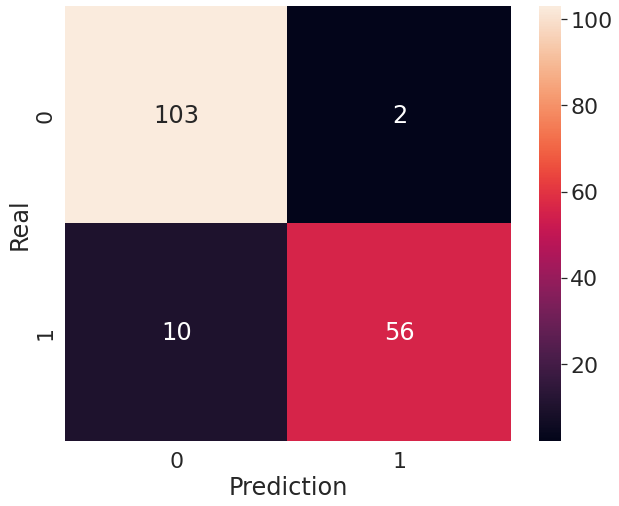

In [24]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(exams_values_v6, 
                                                        diagnosis,
                                                        test_size = 0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(X_train, y_train)
rfecv_selection = RFECV(estimator = classifier, cv = 5, step = 1, scoring="accuracy")
rfecv_selection.fit(X_train, y_train)
rfecv_train = rfecv_selection.transform(X_train)
rfecv_test = rfecv_selection.transform(X_test)
classifier.fit(rfecv_train, y_train)

confusion_mat = confusion_matrix(y_test, classifier.predict(rfecv_test))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(confusion_mat, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel= "Real")

print("Classification result %.2f%%" %(classifier.score(rfecv_test, y_test)*100))

In [25]:
X_train.columns[rfecv_selection.support_]

Index(['exam_1', 'exam_2', 'exam_5', 'exam_6', 'exam_7', 'exam_8', 'exam_9',
       'exam_10', 'exam_12', 'exam_13', 'exam_14', 'exam_15', 'exam_16',
       'exam_18', 'exam_19', 'exam_20', 'exam_21', 'exam_22', 'exam_23',
       'exam_25', 'exam_26', 'exam_27', 'exam_28', 'exam_30', 'exam_31',
       'exam_32'],
      dtype='object')

In [41]:
len(rfecv_selection.cv_results_['mean_test_score'])

28

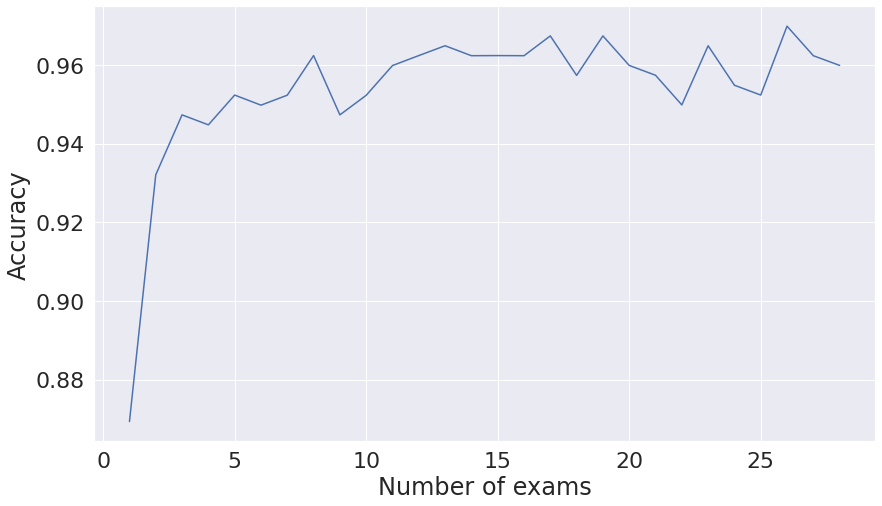

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Number of exams")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv_selection.cv_results_['mean_test_score']) +1), \
         rfecv_selection.cv_results_['mean_test_score'])
plt.show()

In [49]:
exams_values_v7 = rfe_selection.transform(exams_values_v6)
exams_values_v7

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

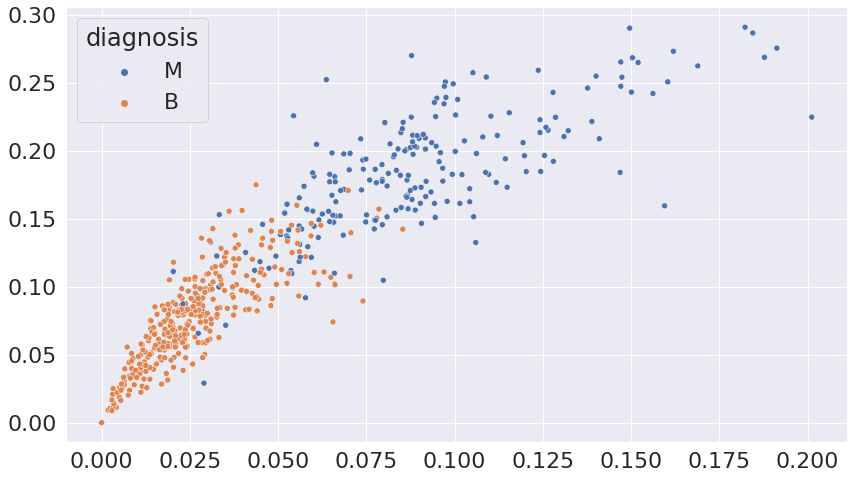

In [50]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = exams_values_v7[:,0] , y = exams_values_v7[:,1], \
                hue = diagnosis)

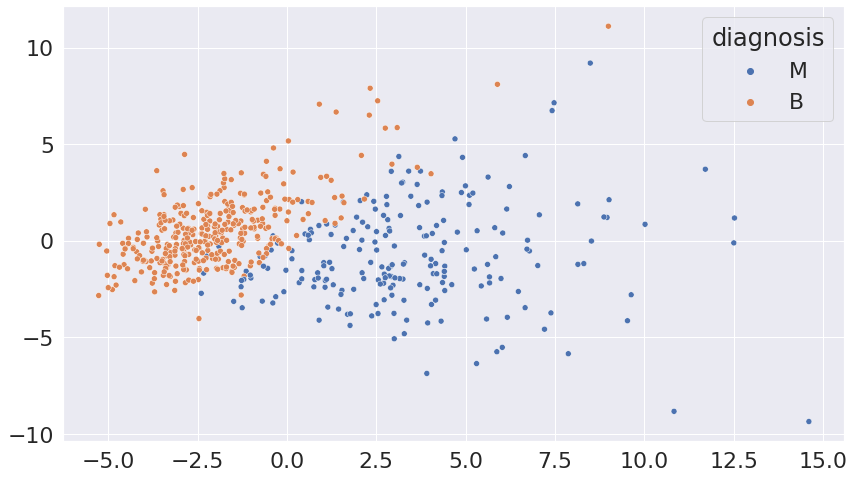

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
exams_values_v8 = pca.fit_transform(exams_values_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exams_values_v8[:,0] , y = exams_values_v8[:,1], \
                hue = diagnosis)

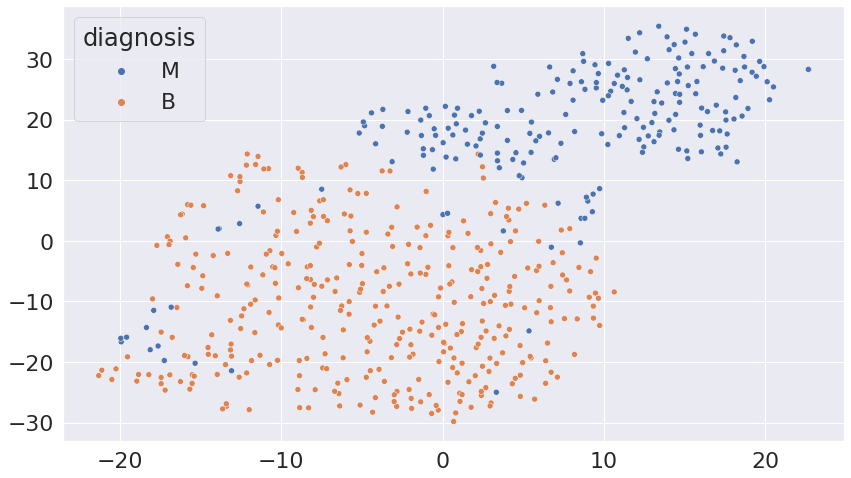

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(init="random", n_components = 2, learning_rate='auto')
exams_values_v9 = tsne.fit_transform(exams_values_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exams_values_v9[:,0] , y = exams_values_v9[:,1], \
                hue = diagnosis)